In [4]:
#importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [5]:
#understanding the datasets
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#access data attributes
dataset = boston.data
for name,index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [11]:
#reshaping data
#converting [506,] to [506,1] i.e. 1D to 2D array
data = dataset[:,12].reshape(-1,1)

In [12]:
#shape of the data
np.shape(dataset)

(506, 13)

In [15]:
#target values
target = boston.target.reshape(-1,1)

In [16]:
#shape of target
np.shape(target)

(506, 1)

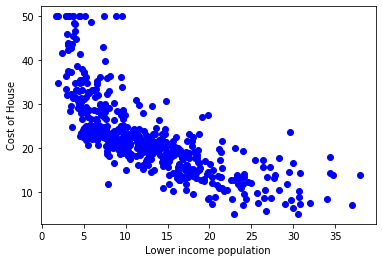

In [18]:
#ensuring that matplotlib is working inside the notebook
%matplotlib inline
plt.scatter(data,target,color='blue')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [28]:
#graph shows us an inverse relationship
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
#creating a regression model
reg = LinearRegression()

#fit the model
reg.fit(data,target)
#no need to split data as we have the data and target value is already set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#prediction
pred = reg.predict(data)

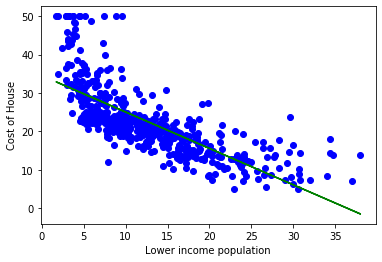

In [30]:
%matplotlib inline
plt.scatter(data,target,color='blue')
plt.plot(data,pred,color='green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [32]:
#circumventing curve issue using polynomial model 
#to get a more suitable curve according to the points
#gives apt degree as well
from sklearn.preprocessing import PolynomialFeatures

#pipeline: to allow merging of models
from sklearn.pipeline import make_pipeline

In [33]:
model = make_pipeline(PolynomialFeatures(3),reg)
#3 from trial and error
#Merged

In [34]:
model.fit(data,target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [35]:
pred = model.predict(data)

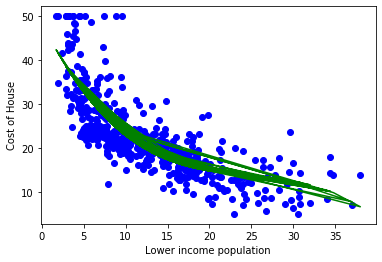

In [36]:
%matplotlib inline
plt.scatter(data,target,color='blue')
plt.plot(data,pred,color='green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [39]:
#r_2 metric
#r2 ranges between -1 & 1
#if r2 in +ve direction the model and the data are in sync if 1 then perfectly in sync
#if r2 in -ve direction the model and the data are not in sync if 1 then perfectly not in sync
from sklearn.metrics import r2_score

In [41]:
#predict
r2_score(pred,target)

0.4798911810275662

In [ ]:
#so in sync and a good score between -1 & 1